IMPORTING LIBRARIES

J

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [5]:
import sys
print(sys.executable)


e:\DS\dsenv\python.exe


In [6]:
%pip install pandas numpy seaborn matplotlib scikit-learn




  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata (52 kB)
  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp310-cp310-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp310-cp310-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using

In [7]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('StudentsPerformance.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.shape


(1000, 8)

1.DATA CHECKS TO PERFORM


1.1: Check Missing Values

In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

1.2: Check Duplicates:

In [13]:
df.duplicated().sum()

np.int64(0)

1.3: Check Data Types

In [14]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

1.4: Check the Number of Unique Values of Each Column

In [19]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [20]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
df.columns.str.strip()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [28]:
print('Categories in gender variable:  ', end=" ")
print(df['gender'].unique())

print('categories in race/ethnicity variable:  ', end=" ")
print(df['race/ethnicity'].unique())

print('categories in parental level of education  variable:  ', end=" ")
print(df['parental level of education'].unique())


print('categories in lunch  variable:  ', end=" ")
print(df['lunch'].unique())

print('categories in test preparation course variable:  ', end=" ")
print(df['test preparation course'].unique())


Categories in gender variable:   ['female' 'male']
categories in race/ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education  variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch  variable:   ['standard' 'free/reduced']
categories in test preparation course variable:   ['none' 'completed']


In [30]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('we have {} numerical features: {}'.format(len(num_features), num_features))
print('we have {} categorical features: {}'.format(len(cat_features), cat_features))

we have 3 numerical features: ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [31]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [32]:
df.shape

(1000, 8)

In [34]:
df['total_score']=df['math score']+ df['reading score']+ df['writing score']
df['average']=df['total_score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [39]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].sum()


print(f'number of students with full reading score: {reading_full}')
print(f'number of students with full writing score: {writing_full}')
print(f'number of students with full math score: {math_full}')

number of students with full reading score: 17
number of students with full writing score: 14
number of students with full math score: 686.6666666666667


In [41]:
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()



print(f'number of students with less than 20 marks in reading: {reading_less_20}')
print(f'number of students with less than 20 marks in writing: {writing_less_20}')
print(f'number of students with less than 20 marks in math: {math_less_20}')

number of students with less than 20 marks in reading: 1
number of students with less than 20 marks in writing: 3
number of students with less than 20 marks in math: 4


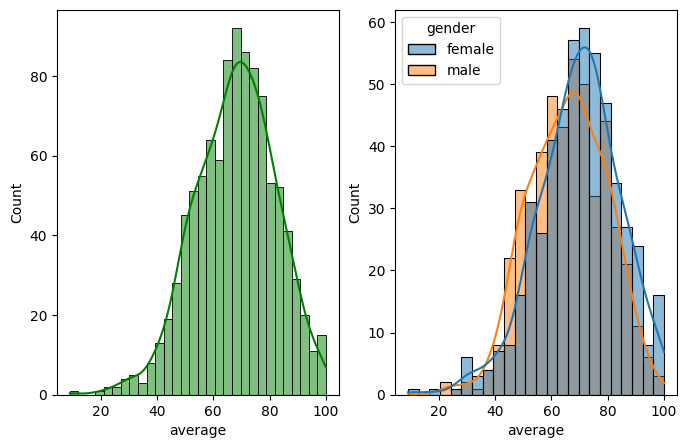

In [47]:
fig, axes=plt.subplots(1,2,figsize=(8,5))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', hue='gender', kde=True, color='g')
plt.show()

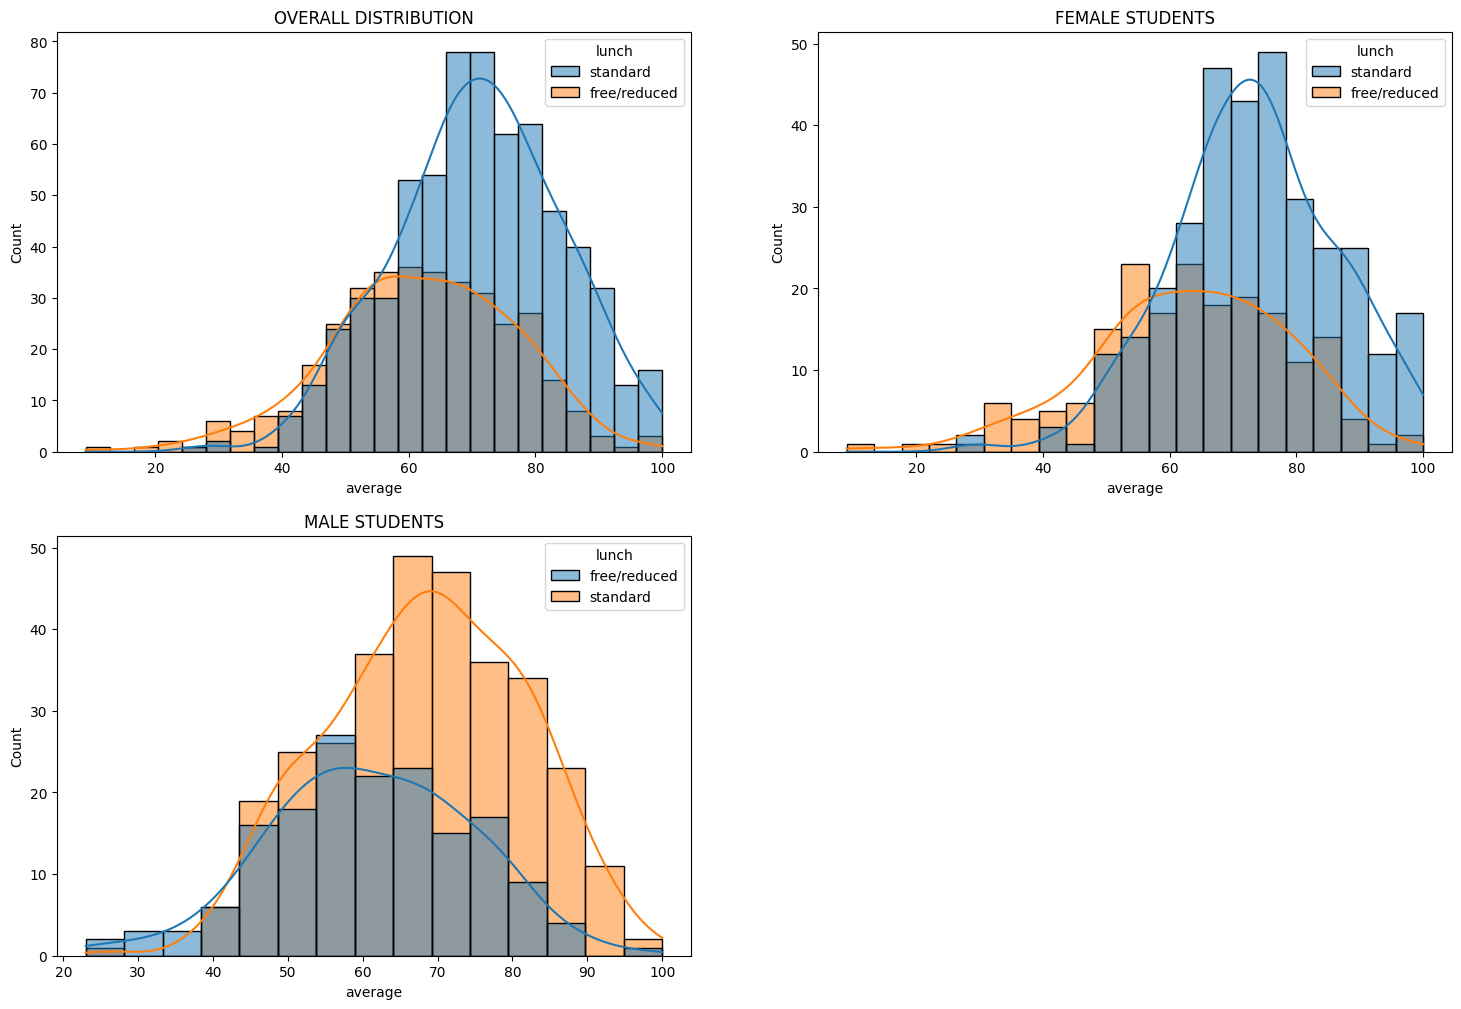

In [56]:
plt.subplots(2,2,figsize=(18,12))
plt.subplot(221)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('OVERALL DISTRIBUTION')
plt.subplot(222)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.title('FEMALE STUDENTS')
plt.subplot(223)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.title('MALE STUDENTS')
plt.subplot(224)
plt.axis('off')
plt.show()


In [57]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


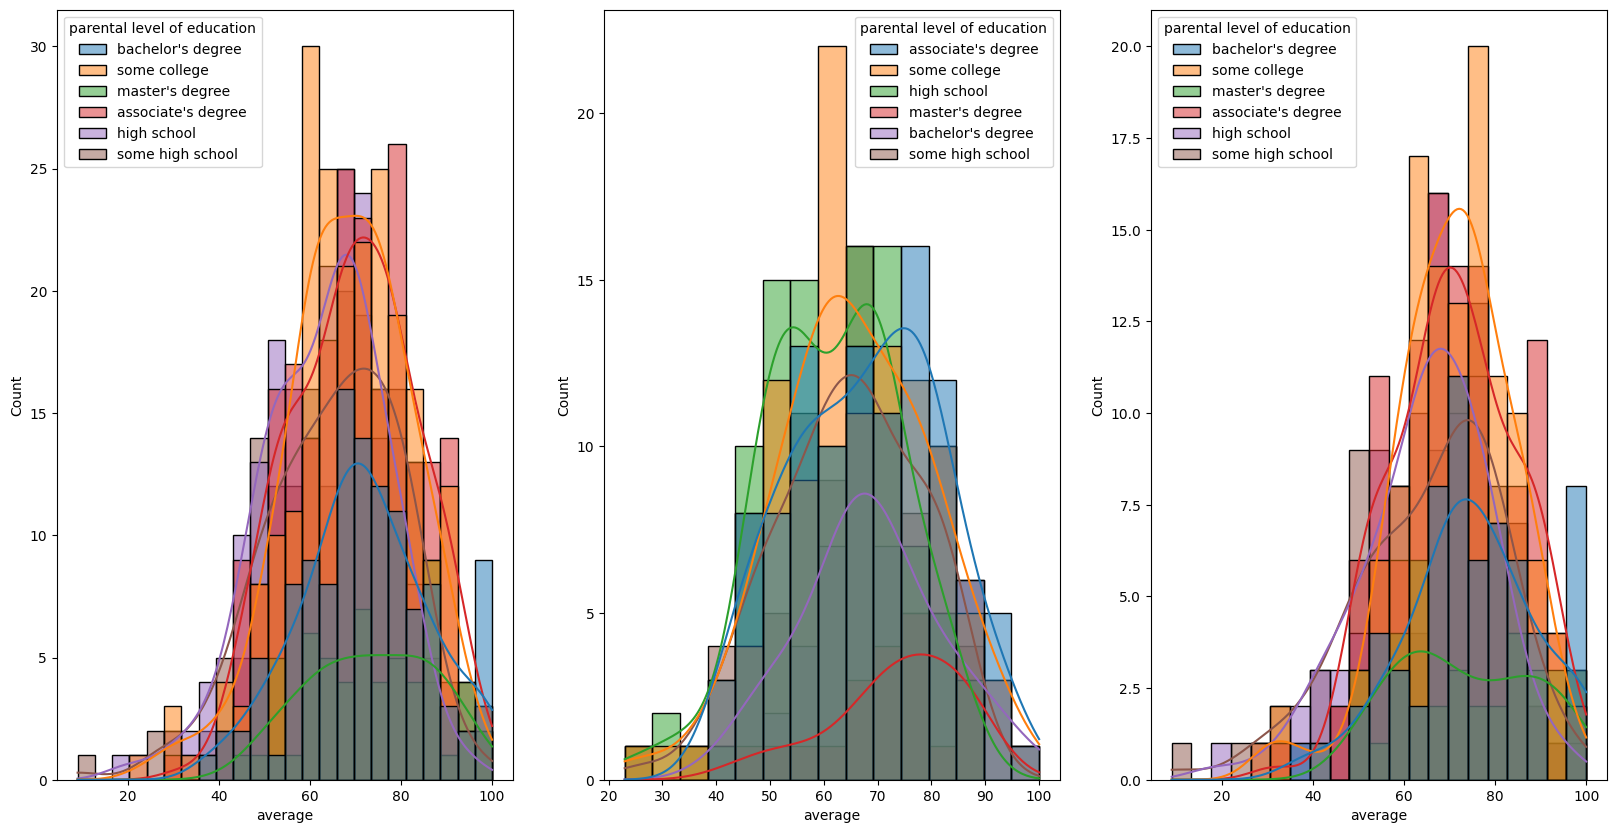

In [62]:
plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], kde=True, x='average', hue='parental level of education' )
plt.show()